# **Plotting and Visualization**


To use the object-oriented Matplotlib API, we first need to import its Python modules.

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [ ]:
import numpy as np
import sympy

A graph in Matplotlib is structured in terms of a Figure instance and one or more Axes instances within the figure. The Figure instance provides a canvas area for drawing, and the Axes instances provide coordinate systems that are assigned to fixed regions of the total figure canvas.

A Figure can contain multiple Axes instances

In [ ]:
x = np.linspace(-5, 2, 100)
y1 = x**3 + 5*x**2 + 10
y2 = 3*x**2 + 10*x
y3 = 6*x + 10

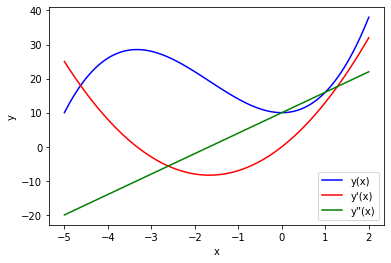

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y1, color="blue", label="y(x)")
ax.plot(x, y2, color="red", label="y'(x)")
ax.plot(x, y3, color="green", label="y”(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

We used the `plt.subplots` function to generate `Figure` and `Axes` instances. 

* This function can be used to create grids of `Axes` instances within a newly created `Figure` instance. Once the `Axes` instance is available, note that all the remaining steps involve calling methods of this `Axes` instance. 

* To create the actual graphs, we use `ax.plot`, which takes as first and second arguments `NumPy` arrays with numerical data for the `x` and `y` values of the graph, and it draws a line connecting these data points. 

* We used the optional `color` and `label` keyword arguments to specify the color of each line and assign a text label to each line that is used in the legend. 

* The axis labels are set with `ax.set_xlabel` and `ax.set_ylabel` methods, which takes as argument a text string with the corresponding label. The legend is added using the `ax.legend` method, which does not require any arguments in
this case since we used the label keyword argument when plotting the curves.

# **Figure**

Figure object is used in Matplotlib to represent a graph
* A Figure object can be created using the function plt.figure, which takes several optional keyword arguments for setting figure properties
* it accepts the figsize keyword argument, which should be assigned to a tuple on the form (width, height), specifying the width and height of the figure canvas in inches.
* it can be used to specify the color of the figure canvas by setting the facecolor keyword argument.

## **Axes**

Once a Figure is created, we can use the `add_axes` method to create a new
`Axes` instance and assign it to a region on the figure canvas. 

The `add_axes` takes one mandatory argument: 
* a list containing the coordinates of the lower-left corner and the width and height of the `Axes` in the figure canvas coordinate system, on the format `(left, bottom, width, height)`
* An alternative to passing a coordinate and size tuple to `add_axes` is to pass an already existing `Axes` instance

The coordinates and the `width` and `height` of the `Axes` object are expressed as fractions of total canvas `width` and `height`
* An `Axes` object that completely fills the canvas corresponds to (0, 0, 1, 1), but this leaves no space for `axis` labels and ticks. 
* A more practical size could be (0.1, 0.1, 0.8, 0.8), which corresponds to a centered `Axes` instance that covers 80% of the width and height of the canvas.

## To generate a grid of Axes


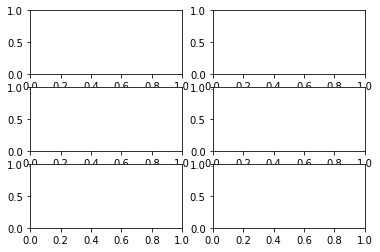

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2)

The function `plt.subplots` returns a tuple `(fig, axes)`, where `fig` is a `Figure` instance and `axes` is a `NumPy` array of `size (nrows, ncols)`, in which each element is an `Axes`.

At this point we can also specify that `columns` and/or `rows` should share `x` and `y` axes, using the `sharex` and `sharey` arguments, which can be set to True or False.

The `plt.subplots` function also takes two special keyword arguments `fig_kw` and `subplot_kw`, which are dictionaries with keyword arguments that are used when creating the `Figure` and `Axes` instances, respectively. 

This allows us to set and retain full control of the properties of the `Figure` and `Axes` objects with `plt.subplots` in a similar way as when directly using `plt.figure` and the `make_axes` method.

## Plot Types

A summary of commonly used 2D plot functions is shown in following figure:

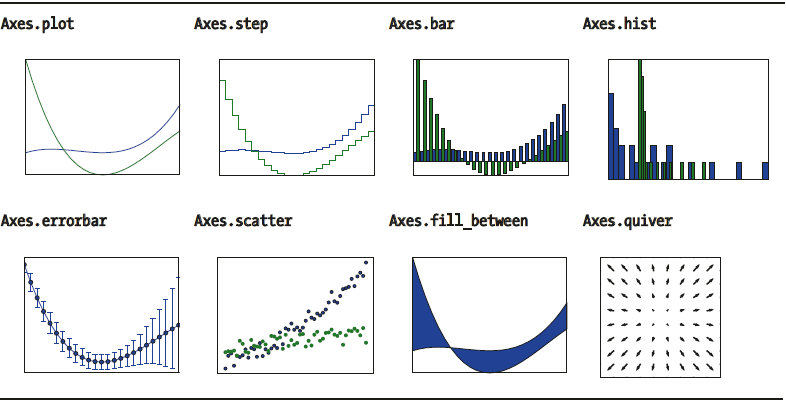

In [ ]:
# Further details can be obtained using help
help(plt.Axes.bar)

## Line Properties

The most basic type of plot is the simple line plot. The basic Line Properties are:
### color:
* A color specification can be a string with a color name, such as “red,” “blue,” etc., or a RGB color code on the form “#aabbcc.”

### alpha:
* Indicating amount of transparency. Float number between 0.0 (completely transparent) and 1.0 (completely opaque).

### linewidth:
* lw Float number. The width of a line.

### linestyle:
* ls “-” – solid
* “--” – dashed
* “:” – dotted
* “.-” – dash-dotted

### marker:
* +, o, * = cross, circle, star
* s = square
* . = small dot
* 1, 2, 3, 4, ... = triangle-shaped symbols with different angles.

### markersize:
* Float number.

### markerfacecolor:
* Color specification (see in the preceding text).

### markeredgewidth:
* Float number.

markeredgecolor:
* Color specification

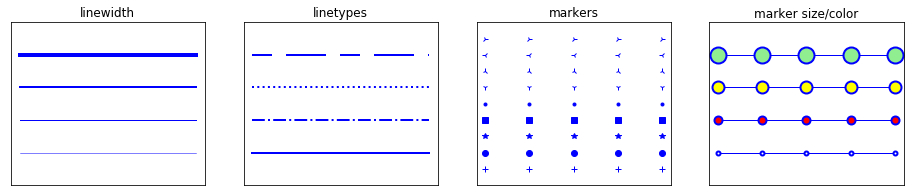

In [ ]:
x = np.linspace(-5, 5, 5)
y = np.ones_like(x)
    
def axes_settings(fig, ax, title, ymax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0, ymax+1)
    ax.set_title(title)
    
fig, axes = plt.subplots(1, 4, figsize=(16,3))
    
# Line width
linewidths = [0.5, 1.0, 2.0, 4.0]
for n, linewidth in enumerate(linewidths):
  axes[0].plot(x, y + n, color="blue", linewidth=linewidth)

axes_settings(fig, axes[0], "linewidth", len(linewidths))
    
# Line style
linestyles = ['-', '-.', ':']
for n, linestyle in enumerate(linestyles):
  axes[1].plot(x, y + n, color="blue", lw=2, linestyle=linestyle)
  
# custom dash style
line, = axes[1].plot(x, y + 3, color="blue", lw=2)
length1, gap1, length2, gap2 = 10, 7, 20, 7
line.set_dashes([length1, gap1, length2, gap2])
axes_settings(fig, axes[1], "linetypes", len(linestyles) + 1)

# marker types
markers = ['+', 'o', '*', 's', '.', '1', '2', '3', '4']
for n, marker in enumerate(markers):
  # lw = shorthand for linewidth, ls = shorthand for linestyle
  axes[2].plot(x, y + n, color="blue", lw=2, ls=' ', marker=marker)
axes_settings(fig, axes[2], "markers", len(markers))

# marker size and color
markersizecolors = [(4, "white"), (8, "red"), (12, "yellow"), 
                      (16, "lightgreen")]
for n, (markersize, markerfacecolor) in enumerate (markersizecolors):
  axes[3].plot(x, y + n, color="blue", lw=1, ls='-', marker='o', 
               markersize=markersize, markerfacecolor=markerfacecolor, 
               markeredgewidth=2)
axes_settings(fig, axes[3], "marker size/color", 
              len(markersizecolors))

### Another example

a symbolic variable for x, and a numerical array with specific values of x

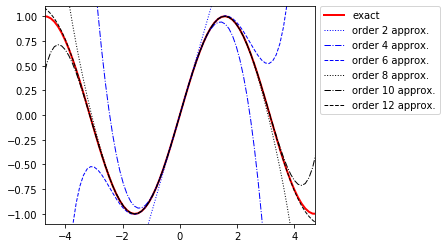

In [ ]:
sym_x = sympy.Symbol("x")
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
def sin_expansion(x, n):
  """
  Evaluate the nth order approximation for the Taylor series expansion of 
  sin(x) for the numerical values in the array x.
  """
  return sympy.lambdify(sym_x, sympy.sin(sym_x).series(n=n+1).
                        removeO(), 'numpy')(x)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), linewidth=2, color="red", label='exact')
colors = ["blue", "black"]
linestyles = [':', '-.', '--']
for idx, n in enumerate(range(1, 12, 2)):
  ax.plot(x, sin_expansion(x, n), color=colors[idx // 3],
          linestyle=linestyles[idx % 3], linewidth=1,
          label="order %d approx." % (n+1))
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-1.5*np.pi, 1.5*np.pi)


# place a legend outsize of the Axes
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
# make room for the legend to the right of the Axes
fig.subplots_adjust(right=.75)

## **Legends**

a legend may be added to an Axes instance in a Matplotlib figure using the legend method.

`loc` argument allows to specify where in the `Axes` area the legend is to be added: 
* `loc=1` for upper-right corner, 
* `loc=2` for upper-left corner, 
* `loc=3` for the lower-left corner, and 
* `loc=4` for lower-right corner

Legend displayed outside the `Axes` object and shown with four columns instead of the single one, here using `ax.legend(ncol=4, loc=3, bbox_to_anchor=(0, 1))`

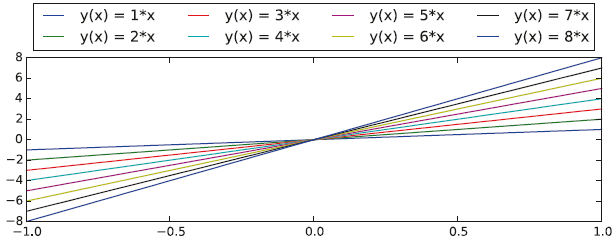

## **Axis Labels and Titles**

We can set the axis labels using the `set_xlabel` and `set_ylabel` methods:

Text(0.5, 1.0, 'axis labels and title example')

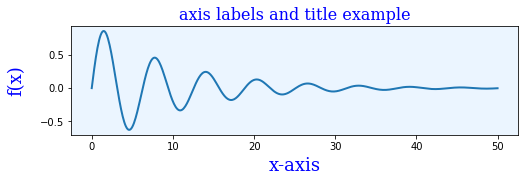

In [ ]:
x = np.linspace(0, 50, 500)
y = np.sin(x) * np.exp(-x/10)

fig, ax = plt.subplots(figsize=(8, 2), subplot_kw={'facecolor':
                                                   "#ebf5ff"})
ax.plot(x, y, lw=2)

ax.set_xlabel ("x-axis", labelpad=5, fontsize=18, fontname='serif',
               color="blue")

ax.set_ylabel ("f(x)", labelpad=15, fontsize=18, fontname='serif',
               color="blue")

ax.set_title("axis labels and title example", fontsize=16,
             fontname='serif', color="blue")

## **Axis Range**

By default, the range of the `x` and `y` axes of a `Matplotlib` is automatically adjusted to the data that is plotted in the `Axes` object.

However to explicitly set the axis ranges we can use the `set_xlim` and `set_ylim` methods of the `Axes` object

Text(0.5, 1.0, "axis('equal')")

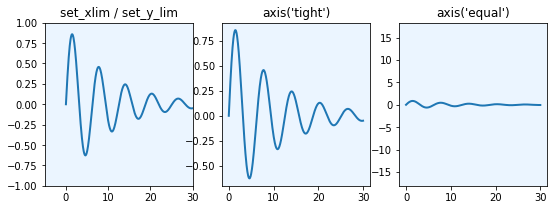

In [ ]:
x = np.linspace(0, 30, 500)
y = np.sin(x) * np.exp(-x/10)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), subplot_kw={'facecolor': "#ebf5ff"})
axes[0].plot(x, y, lw=2)
axes[0].set_xlim(-5, 30)
axes[0].set_ylim(-1, 1)
axes[0].set_title("set_xlim / set_y_lim")

axes[1].plot(x, y, lw=2)
axes[1].axis('tight')
axes[1].set_title("axis('tight')")

axes[2].plot(x, y, lw=2)
axes[2].axis('equal')
axes[2].set_title("axis('equal')")

# **Log Plots**

In visualization of data that spans several orders of magnitude, it is useful to work with logarithmic coordinate systems. 

In Matplotlib, there are several `plot` functions for graphing functions in such coordinate systems, for example, loglog, semilogx, and semilogy, which use logarithmic scales for both the x and y axes, for only the x axis, and for only the y axis, respectively.

An alternative approach is to use the standard `plot` method and to separately configure the axis scales to be logarithmic using the set_xscale and/or set_yscale method with `log` as first argument.

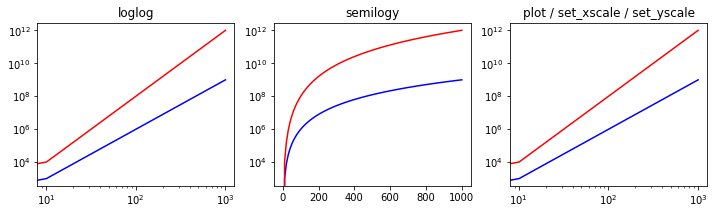

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
x = np.linspace(0, 1e3, 100)
y1, y2 = x**3, x**4

axes[0].set_title('loglog')
axes[0].loglog(x, y1, 'b', x, y2, 'r')

axes[1].set_title('semilogy')
axes[1].semilogy(x, y1, 'b', x, y2, 'r')

axes[2].set_title('plot / set_xscale / set_yscale')
axes[2].plot(x, y1, 'b', x, y2, 'r')
axes[2].set_xscale('log')
axes[2].set_yscale('log')

# **Twin Axes**

An interesting trick with axes that Matplotlib provides is the twin axis feature, which allows displaying two independent axes overlaid on each other.

This is useful when plotting two different quantities, for example, with different units, within the same graph.

Here we use the `twinx` method (there is also a `twiny` method) to produce second `Axes` instance with shared `x axis` and a new independent `y axis`, which is displayed on the right side of the graph.

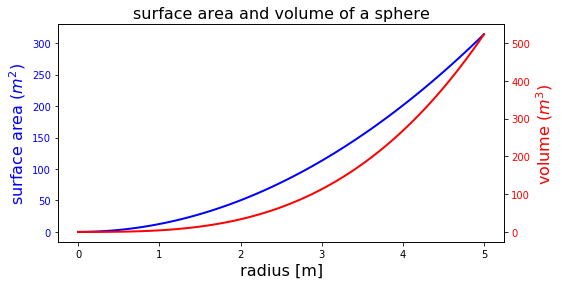

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 4))

r = np.linspace(0, 5, 100)
a = 4 * np.pi * r ** 2 # area
v = (4 * np.pi / 3) * r ** 3 # volume

ax1.set_title("surface area and volume of a sphere", fontsize=16)
ax1.set_xlabel("radius [m]", fontsize=16)

ax1.plot(r, a, lw=2, color="blue")
ax1.set_ylabel(r"surface area ($m^2$)", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
  label.set_color("blue")

ax2 = ax1.twinx()
ax2.plot(r, v, lw=2, color="red")
ax2.set_ylabel(r"volume ($m^3$)", fontsize=16, color="red")
for label in ax2.get_yticklabels():
  label.set_color("red")

# **Spines**

The lines that make up the surrounding box are called axis spines in Matplotlib,
and we can use the Axes.spines attribute to change their properties. 

For example, we might want to remove the top and the right spines and move the spines to coincide with the origin of the coordinate systems.

The `spines` attribute of the `Axes` object is a dictionary with the keys `right, left, top`, and `bottom` that can be used to access each spine individually. 

We can use the set_color method to set the color to `'None'` to indicate that a particular spine should not be displayed, and in this case, we also need to remove the ticks associated with that spine, using the set_ticks_position method of Axes.xaxis and Axes.yaxis (which accepts the arguments `'both', 'top'`, or `'bottom'` and `'both', 'left'`, or `'right'`, respectively).

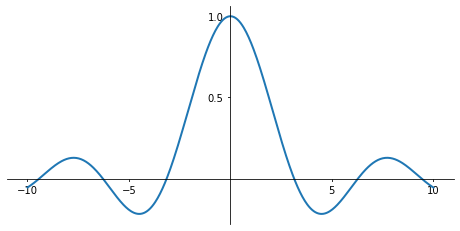

In [ ]:
x = np.linspace(-10, 10, 500)
y = np.sin(x) / x

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y, linewidth=2)

# remove top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spine ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spine to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

ax.set_xticks([-10, -5, 5, 10])
ax.set_yticks([0.5, 1])

# give each label a solid background of white, to not overlap with the plot line
for label in ax.get_xticklabels() + ax.get_yticklabels():
  label.set_bbox({'facecolor': 'white','edgecolor': 'white'})

# **3D Plots**

* In Matplotlib, drawing 3D graphs requires using a different axes object, namely,the Axes3D object that is available from the mpl_toolkits.mplot3d module. We can create a 3D-aware Axes instance explicitly using the constructor of the Axes3D class, by passing a Figure instance as argument: `ax = Axes3D(fig)`

* Alternatively, we can use the `add_subplot` function with the projection=`'3d'` argument:

       `ax = ax = fig.add_subplot(1, 1, 1, projection='3d')`

* or use `plt.subplots` with the `subplot_kw={'projection': '3d'}` argument:

       `fig, ax = plt.subplots(1, 1, figsize=(8, 6), subplot_kw={'projection': '3d'})`

* 3D plotting functions take two-dimensional coordinate and data arrays X, Y, and Z as first arguments as well as some additional parameters for tuning specific properties.





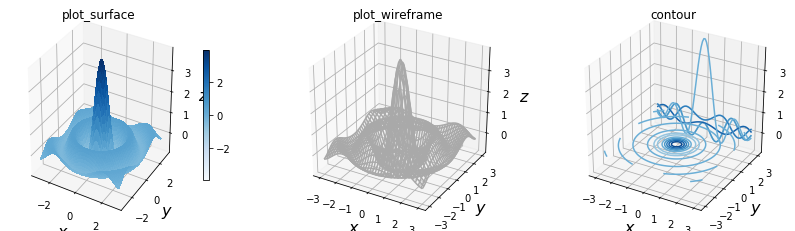

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), subplot_kw={'projection': '3d'})

def title_and_labels(ax, title):
  ax.set_title(title)
  ax.set_xlabel("$x$", fontsize=16)
  ax.set_ylabel("$y$", fontsize=16)
  ax.set_zlabel("$z$", fontsize=16)

x = y = np.linspace(-3, 3, 74)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(4 * R) / R

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

p = axes[0].plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, 
                         antialiased=False, norm=norm, cmap=mpl.cm.Blues)

cb = fig.colorbar(p, ax=axes[0], shrink=0.6)
title_and_labels(axes[0], "plot_surface")

p = axes[1].plot_wireframe(X, Y, Z, rstride=2, cstride=2, color="darkgrey")
title_and_labels(axes[1], "plot_wireframe")

cset = axes[2].contour(X, Y, Z, zdir='z', offset=0, norm=norm, cmap=mpl.cm.Blues)
cset = axes[2].contour(X, Y, Z, zdir='y', offset=3, norm=norm,
cmap=mpl.cm.Blues)
title_and_labels(axes[2], "contour")